# CE543: Intro to Geotech EQ Engr., Homework Assignment 4
Completed by Brandon Auyeung for Dr. Arash Khosravifar
Due on 6th of Febuary 2026

## Problem 1

In [1]:
import numpy as np
import pandas as pd
import great_tables as gt
import matplotlib.pyplot as plt

### Problem 1, Part 1

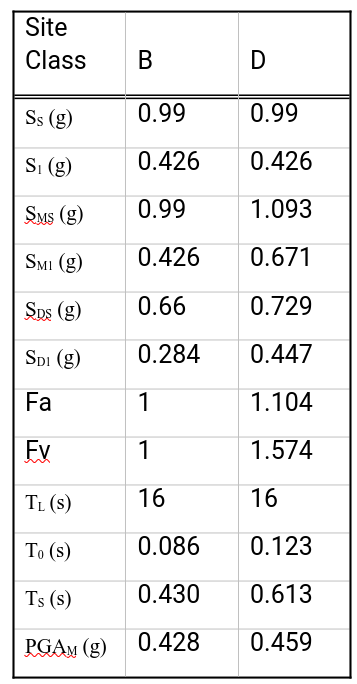

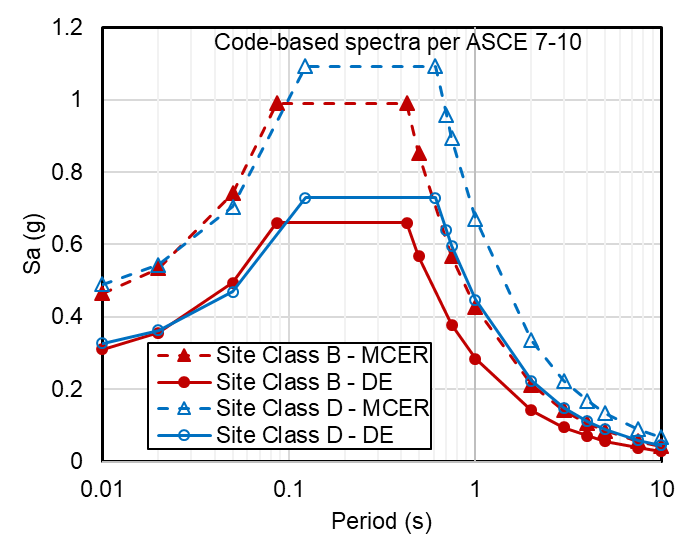


Collect ASCE 7-10 factors from the given table

In [2]:
asce710_factors = np.array([[0.99,0.426,0.99,0.426,0.66,0.284,1,1,16,0.086,0.430,0.428],
[0.99,0.426,1.093,0.671,0.729,0.447,1.104,1.574,16,0.123,0.613,0.459]], dtype=np.float32)
asce710_factors # asce 7-10 factors matrix. column 0 is site class b, col 2 is site class d

array([[ 0.99 ,  0.426,  0.99 ,  0.426,  0.66 ,  0.284,  1.   ,  1.   ,
        16.   ,  0.086,  0.43 ,  0.428],
       [ 0.99 ,  0.426,  1.093,  0.671,  0.729,  0.447,  1.104,  1.574,
        16.   ,  0.123,  0.613,  0.459]], dtype=float32)

We can use https://ascehazardtool.org to confirm Arash's numbers.

The main purpose of this is to obtain the DE and $MCE_R$, so we will not be doing this.

$S_s = S_a(T=0.2)$ & $ F_a \equiv $ factor from ASCE 7-10 Table 11.4-1 $ \rightarrow S_{ms} = F_aS_s \rightarrow S_{Ds} = \frac{2}{3}S_{ms} \equiv S_a(T=0.2 \ s)$ for DE spectra generation 

Similarly:

$S_1 = S_a(T=0.2)$ & $ F_v \equiv $ factor from ASCE 7-10 Table 11.4-2 $ \rightarrow S_{m1} = F_vS_1 \rightarrow S_{D1} = \frac{2}{3}S_{m1} \equiv S_a(T=1.0 \ s)$ for DE spectra generation 

DE spectra generation done via ASCE 7-10 Figure 11.4-1.

$MCE_R = \frac{3}{2}DE$

In [3]:
SDs_siteB = asce710_factors[0][4]
SDs_siteD = asce710_factors[1][4]
SD1_siteB = asce710_factors[0][5]
SD1_siteD = asce710_factors[1][5]

print("Site Class B SDs = ", SDs_siteB)
print("Site Class D SDs = ", SDs_siteD)
print("Site Class B SD1 = ", SD1_siteB)
print("Site Class D SD1 = ", SD1_siteD)

Site Class B SDs =  0.66
Site Class D SDs =  0.729
Site Class B SD1 =  0.284
Site Class D SD1 =  0.447


DE spectra generation:

$$S_a = \begin{cases} 

S_{Ds}\left( 0.4 +0.6 \frac{T}{T_0} \right) & \text{if} \ T < T_0 \\
S_{Ds} & \text{if} \ T_0 \leq T \leq T_s \\
\frac{S_{D1}}{T} & \text{if} \ T_s \leq T \leq T_L \\
\frac{S_{D1}T_L}{T^2} &  \text{else}

\end{cases}$$

Note:

$T_s = \frac{S_{D1}}{S_{Ds}} $

$ T_0 = 0.2T_s$

$ T_L( \text{in Oregon}) = 16 s$

In [4]:
Ts_siteB = SD1_siteB / SDs_siteB # seconds
Ts_siteD = SD1_siteD / SDs_siteD
T0_siteB = 0.2*Ts_siteB
T0_siteD = 0.2*Ts_siteD
TL = 16


print("Site Class B Ts = ", Ts_siteB)
print("Site Class D Ts = ", Ts_siteD)
print("Site Class B T0 = ", T0_siteB)
print("Site Class D T0 = ", T0_siteD)
print("TL(OR) = ", TL)

Site Class B Ts =  0.43030304
Site Class D Ts =  0.6131687
Site Class B T0 =  0.086060606
Site Class D T0 =  0.12263375
TL(OR) =  16


In [5]:
periods = np.linspace(0.01,10,3000)

DE_Sa_siteB = np.zeros(len(periods))
DE_Sa_siteD = np.zeros(len(periods))

# site B piecewise
for i, T in enumerate(periods):
    if T < T0_siteB:
        DE_Sa_siteB[i] = SDs_siteB * (0.4 + (0.6 * (T/T0_siteB)))
    elif T0_siteB <= T <= Ts_siteB:
        DE_Sa_siteB[i] = SDs_siteB
    elif Ts_siteB <= T <= TL:
        DE_Sa_siteB[i] = SD1_siteB / T
    else:
        DE_Sa_siteB[i] = (SD1_siteB*TL)/(T**2)

# site D piecewise
for i, T in enumerate(periods):
    if T < T0_siteD:
        DE_Sa_siteD[i] = SDs_siteD * (0.4 + (0.6 * (T/T0_siteD)))
    elif T0_siteD <= T <= Ts_siteD:
        DE_Sa_siteD[i] = SDs_siteD
    elif Ts_siteD<= T <= TL:
        DE_Sa_siteD[i] = SD1_siteD / T
    else:
        DE_Sa_siteD[i] = (SD1_siteD*TL)/(T**2)

Generate $\text{MCE}_{\text{R}}$ from DE

In [6]:
MCER_siteB = 3/2 * DE_Sa_siteB
MCER_siteD = 3/2 * DE_Sa_siteD

In [11]:
dusicka = np.loadtxt('ARSCSZ_2-2-2026_152537.csv', delimiter=',', dtype=np.float32)
dusicka

array([[0.        , 0.12252029],
       [0.05      , 0.13848335],
       [0.1       , 0.21216711],
       [0.15      , 0.23844436],
       [0.2       , 0.23396295],
       [0.25      , 0.22514962],
       [0.3       , 0.21763717],
       [0.4       , 0.20093895],
       [0.5       , 0.18334277],
       [0.6       , 0.16446151],
       [0.7       , 0.15441748],
       [0.8       , 0.14690624],
       [1.        , 0.1289401 ],
       [1.5       , 0.09754155],
       [2.        , 0.07699778],
       [2.5       , 0.06374022],
       [3.        , 0.05306301]], dtype=float32)

Graph side by side

Text(0, 0.5, '$S_a$ [Gs]')

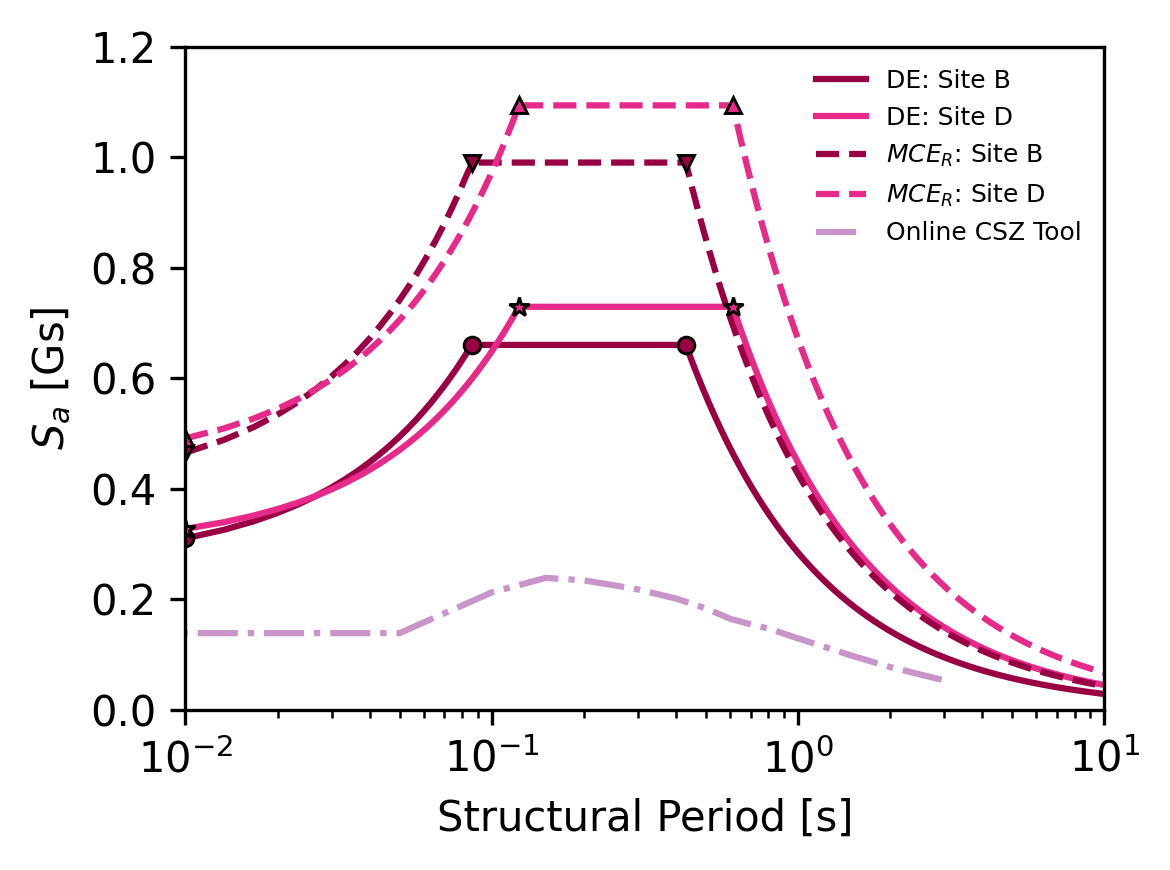

In [15]:
fig, ax = plt.subplots(figsize=(4,3), dpi=300, tight_layout=True)

# plot general lines
ax.semilogx(periods, DE_Sa_siteB, color='#980043', label='DE: Site B')
ax.semilogx(periods, DE_Sa_siteD, color='#e7298a', label='DE: Site D')
ax.semilogx(periods, MCER_siteB, color='#980043', linestyle = '--', label='$MCE_R$: Site B')
ax.semilogx(periods, MCER_siteD, color='#e7298a', linestyle = '--', label='$MCE_R$: Site D')

# plot values at T = 0, T0 and Ts for DE
ax.plot(T0_siteB, SDs_siteB, 'o', color='#980043', markersize=4, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(Ts_siteB, SDs_siteB, 'o', color='#980043', markersize=4, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(0.01, SDs_siteB * (0.4 + (0.6 * (0.01/T0_siteB))), 'o', color='#980043', markersize=4, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(T0_siteD, SDs_siteD, '*', color='#e7298a', markersize=5, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(Ts_siteD, SDs_siteD, '*', color='#e7298a', markersize=5, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(0.01, SDs_siteD * (0.4 + (0.6 * (0.01/T0_siteD))), '*', color='#e7298a', markersize=5, markeredgecolor='black', markeredgewidth=0.7)

# plot dusickas work
ax.semilogx(dusicka[:,0], dusicka[:,1], '-.', color='#c994c7', label='Online CSZ Tool')

# plot values at T0 and Ts for MCE_R
ax.plot(T0_siteB, 3/2 * SDs_siteB, 'v', color='#980043', markersize=4, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(Ts_siteB, 3/2 * SDs_siteB, 'v', color='#980043', markersize=4, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(0.01, 3/2 * SDs_siteB * (0.4 + (0.6 * (0.01/T0_siteB))), 'v', color='#980043', markersize=4, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(Ts_siteD, 3/2 * SDs_siteD, '^', color='#e7298a', markersize=4, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(T0_siteD, 3/2 * SDs_siteD, '^', color='#e7298a', markersize=4, markeredgecolor='black', markeredgewidth=0.7)
ax.plot(0.01, 3/2 * SDs_siteD * (0.4 + (0.6 * (0.01/T0_siteD))), '^', color='#e7298a', markersize=4, markeredgecolor='black', markeredgewidth=0.7)

ax.legend(frameon=False, loc='upper right', fontsize=6)
ax.set_xlim(0.01,10)
ax.set_ylim(0,1.2)
ax.set_xlabel('Structural Period [s]')
ax.set_ylabel('$S_a$ [Gs]')